In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19.csv', encoding = "ISO-8859-1", error_bad_lines=False)

In [3]:
df.tail()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
7657,60,Yukon,Yukon,30-07-2021,1.0,596,NaN,7.0,596,NaN,...,2.38,45.0,107.01,1.0,2.38,6.0,15.29,0.0,0.34,28.54
7658,61,Northwest Territories,Territoires du Nord-Ouest,30-07-2021,1.0,128,NaN,0.0,128,NaN,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
7659,62,Nunavut,Nunavut,30-07-2021,0.0,657,NaN,4.0,657,NaN,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
7660,99,Repatriated travellers,Voyageurs rapatriÃ©s,30-07-2021,NaN,13,NaN,0.0,13,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
7661,1,Canada,Canada,30-07-2021,NaN,1430483,NaN,26592.0,1430483,NaN,...,0.27,4772.0,12.56,53.0,0.14,682.0,1.79,8.0,0.02,1.09


In [4]:
df.isnull().sum()

pruid                     0
prname                    0
prnameFR                  0
date                      0
update                 4828
numconf                   0
numprob                1350
numdeaths               119
numtotal                  0
numtested              2757
numtests                  0
numrecover              524
percentrecover          728
ratetested             3096
ratetests               580
numtoday                  0
percentoday               0
ratetotal               507
ratedeaths              507
numdeathstoday          119
percentdeath            397
numtestedtoday         2757
numteststoday            72
numrecoveredtoday       524
percentactive           397
numactive               397
rateactive              507
numtotal_last14         252
ratetotal_last14        746
numdeaths_last14        252
ratedeaths_last14       746
numtotal_last7          252
ratetotal_last7         746
numdeaths_last7         252
ratedeaths_last7        747
avgtotal_last7      

In [5]:
df.shape

(7662, 40)

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [7]:
df['num7davg'] = df['numtotal_last7'] / 7

In [8]:
#df.dtypes
df.tail()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,num7davg
7657,60,Yukon,Yukon,2021-07-30,1.0,596,NaN,7.0,596,NaN,...,45.0,107.01,1.0,2.38,6.0,15.29,0.0,0.34,28.54,6.428571
7658,61,Northwest Territories,Territoires du Nord-Ouest,2021-07-30,1.0,128,NaN,0.0,128,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000
7659,62,Nunavut,Nunavut,2021-07-30,0.0,657,NaN,4.0,657,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000
7660,99,Repatriated travellers,Voyageurs rapatriÃ©s,2021-07-30,NaN,13,NaN,0.0,13,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.000000
7661,1,Canada,Canada,2021-07-30,NaN,1430483,NaN,26592.0,1430483,NaN,...,4772.0,12.56,53.0,0.14,682.0,1.79,8.0,0.02,1.09,681.714286


In [9]:
col_list = ['prname', 'date', 'numtoday', 'numtotal', 'numtotal_last7', 
            'numtotal_last14', 'numdeathstoday', 'numrecover', 'numrecoveredtoday','num7davg']

In [10]:
f = (df['prname'] == 'Canada')
df_today = df.loc[f, col_list]
f2 = df['prname'] == 'Ontario'
df_on_today = df.loc[f2, col_list]
#
fab = df['prname'] == 'Alberta'
df_ab_today = df.loc[fab, col_list]
#
fqc = df['prname'] == 'Quebec'
df_qc_today = df.loc[fqc, col_list]



In [11]:
df_on_today = df_on_today.set_index('date')

In [12]:
df_today.set_index('date', inplace=True)

In [13]:
# df = df[["C", "A", "B"]]
# or
#column_names = ["C", "A", "B"]
# df = df.reindex(columns=column_names)

# df_today.columns

In [14]:
#cn = ['prname', 'numtoday', 'numtotal', 'numtotal_last7', 'num7davg', 'numtotal_last14',
#       'numdeathstoday', 'numrecover']
#df_today = df_today.reindex(columns=cn)

In [15]:
# Re-order Columns
df_today = df_today[['prname', 'numtoday', 'numtotal', 'numtotal_last7', 'num7davg', 'numtotal_last14',
       'numdeathstoday', 'numrecover', 'numrecoveredtoday']]

In [16]:
df_today

,prname,numtoday,numtotal,numtotal_last7,num7davg,numtotal_last14,numdeathstoday,numrecover,numrecoveredtoday
date,,,,,,,,,
2020-01-31,Canada,4,4,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-08,Canada,3,7,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-16,Canada,1,8,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-21,Canada,1,9,NaN,NaN,NaN,0.0,NaN,NaN
2020-02-24,Canada,1,10,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-07-26,Canada,436,1427339,3555.0,507.857143,6237.0,5.0,1395740.0,709.0
2021-07-27,Canada,578,1427917,3794.0,542.000000,6479.0,8.0,1396192.0,452.0
2021-07-28,Canada,765,1428682,4159.0,594.142857,6863.0,10.0,1396636.0,444.0


In [17]:
df_ab_today.set_index('date', inplace=True)
df_qc_today.set_index('date', inplace=True)

Canada - Cases and Deaths - Last 5 days
            numtoday  numdeathstoday
date                                
2021-07-26       436             5.0
2021-07-27       578             8.0
2021-07-28       765            10.0
2021-07-29       894             5.0
2021-07-30       907            17.0

Ontario
            numtoday  numdeathstoday
date                                
2021-07-26       119             3.0
2021-07-27       129             5.0
2021-07-28       158             4.0
2021-07-29       218             3.0
2021-07-30       226            11.0


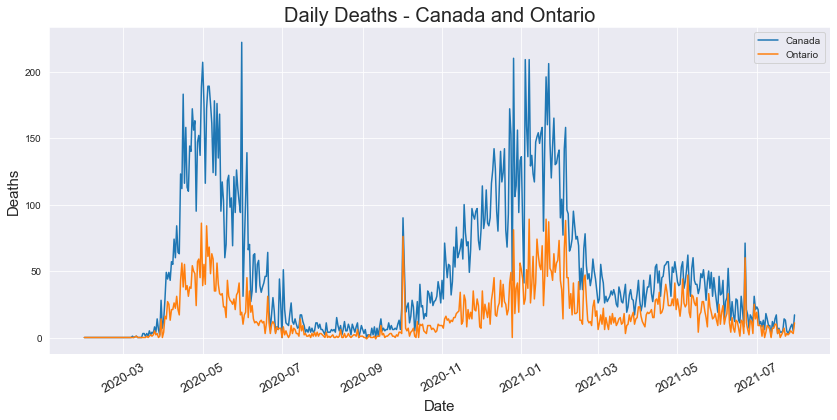

In [18]:
print('Canada - Cases and Deaths - Last 5 days')
print(df_today[['numtoday','numdeathstoday']].tail())
print("")
print('Ontario')
print(df_on_today[['numtoday','numdeathstoday']].tail())
plt.figure(figsize=(14,6))
plt.title('Daily Deaths - Canada and Ontario', fontsize=20)
plt.ylabel('Deaths', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_today['numdeathstoday'], label='Canada')
sns.lineplot(data=df_on_today['numdeathstoday'], label='Ontario')
plt.show()

In [19]:
df_today['numtoday'].tail(15)

date
2021-07-16    397
2021-07-17    380
2021-07-18    498
2021-07-19    265
2021-07-20    339
2021-07-21    400
2021-07-22    570
2021-07-23    618
2021-07-24    517
2021-07-25    675
2021-07-26    436
2021-07-27    578
2021-07-28    765
2021-07-29    894
2021-07-30    907
Name: numtoday, dtype: int64

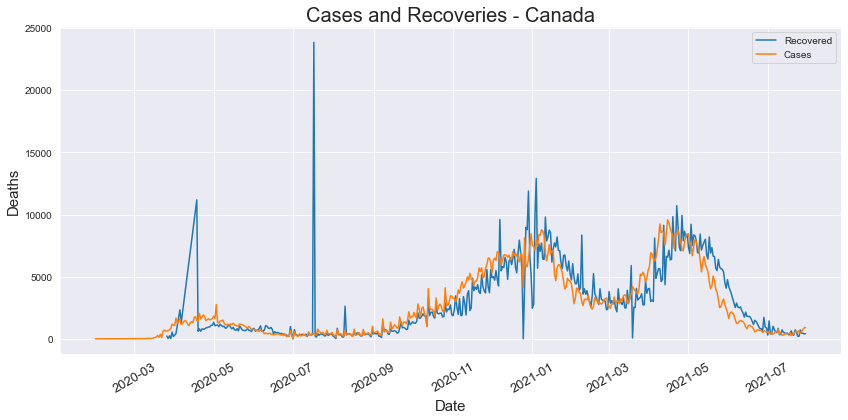

In [20]:
plt.figure(figsize=(14,6))
plt.title('Cases and Recoveries - Canada', fontsize=20)
plt.ylabel('Deaths', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_today['numrecoveredtoday'], label='Recovered')
sns.lineplot(data=df_today['numtoday'], label='Cases')
plt.show()

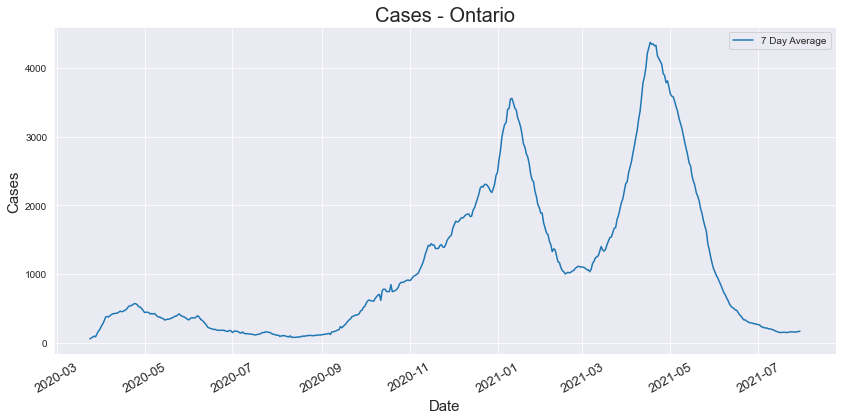

In [21]:
plt.figure(figsize=(14,6))
plt.title('Cases - Ontario', fontsize=20)
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=30, fontsize=13)
#sns.lineplot(data=df_on_today['numrecoveredtoday'], label='Daily Count')
sns.lineplot(data=df_on_today['num7davg'], label='7 Day Average')
plt.show()

In [22]:
fmore = (df['prname'] == 'Quebec') | (df['prname'] == 'Ontario') | (df['prname'] == 'Canada')
df_more_today = df.loc[fmore, col_list]

In [23]:
df_more_today.describe()

,numtoday,numtotal,numtotal_last7,numtotal_last14,numdeathstoday,numrecover,numrecoveredtoday,num7davg
count,1560.000000,1.560000e+03,1482.000000,1482.00000,1560.000000,1.437000e+03,1437.000000,1482.000000
mean,1511.511538,3.009003e+05,11114.354251,22208.65722,30.238462,2.978353e+05,1608.067502,1587.764893
std,1892.888817,3.640557e+05,13229.342109,26305.44358,38.214389,3.535229e+05,2155.890269,1889.906016
min,0.000000,1.000000e+00,286.000000,554.00000,-1.000000,0.000000e+00,0.000000,40.857143
25%,269.250000,5.365775e+04,2537.250000,5078.50000,5.000000,5.088600e+04,289.000000,362.464286
50%,805.500000,1.452385e+05,6251.000000,12766.00000,15.000000,1.582010e+05,834.000000,893.000000
75%,1843.500000,3.744060e+05,13658.750000,27826.25000,41.000000,3.634150e+05,1984.000000,1951.250000
max,9570.000000,1.430483e+06,61113.000000,119808.00000,222.000000,1.397451e+06,23853.000000,8730.428571


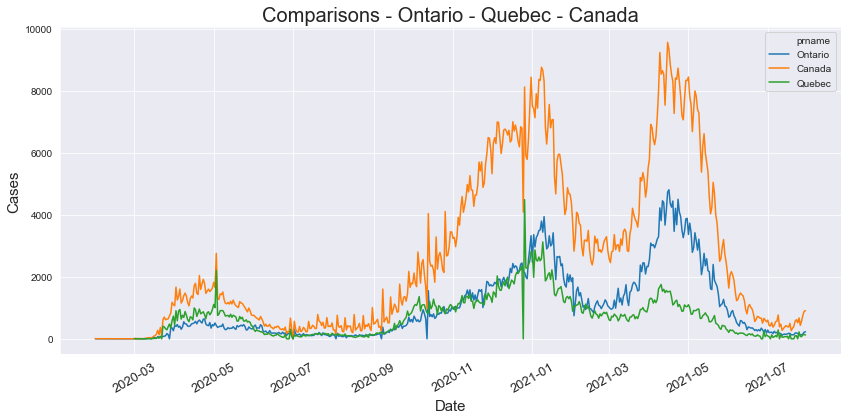

In [24]:
plt.figure(figsize=(14,6))
plt.title('Comparisons - Ontario - Quebec - Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_more_today, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [25]:
fatlantic = (df['prname'] == 'Prince Edward Island') | (df['prname'] == 'New Brunswick') | (df['prname'] == 'Nova Scotia') | (df['prname'] == 'Newfoundland and Labrador')
df_atlantic = df.loc[fatlantic, col_list]

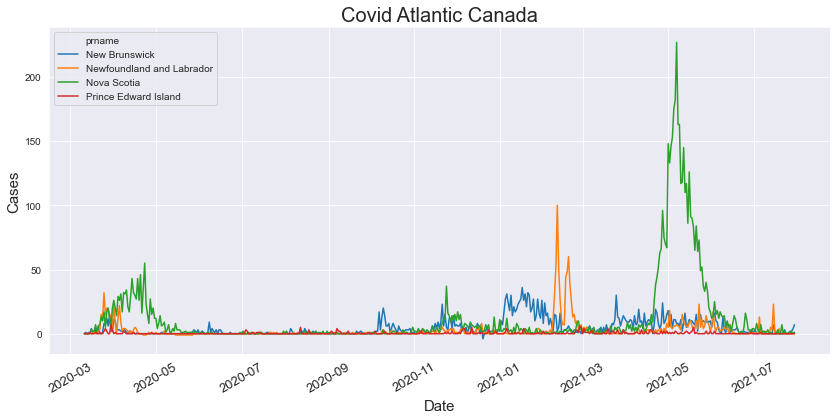

In [26]:
plt.figure(figsize=(14,6))
plt.title('Covid Atlantic Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_atlantic, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [27]:
fwest = (df['prname'] == 'British Columbia') | (df['prname'] == 'Alberta') | (df['prname'] == 'Saskatchewan') | (df['prname'] == 'Manitoba')
df_west = df.loc[fwest, col_list]

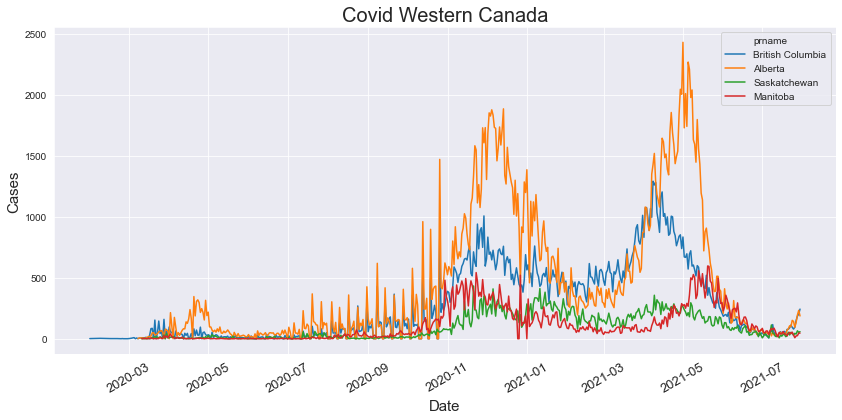

In [28]:
plt.figure(figsize=(14,6))
plt.title('Covid Western Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_west, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [29]:
#'Northwest Territories', 'Nunavut', 'Yukon'


In [30]:
fnorth = (df['prname'] == 'Northwest Territories') | (df['prname'] == 'Nunavut') | (df['prname'] == 'Yukon')
df_north = df.loc[fnorth, col_list]

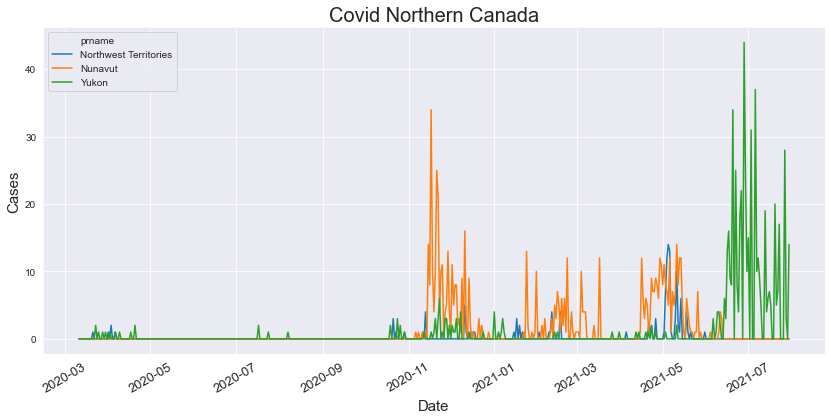

In [31]:
plt.figure(figsize=(14,6))
plt.title('Covid Northern Canada', fontsize=20)
plt.xticks(rotation=30, fontsize=13)
sns.lineplot(data=df_north, x="date", y="numtoday", hue="prname")
plt.ylabel('Cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [32]:
yukon = df_north.loc[df['prname'] == 'Yukon']['numtoday']
yukon.head()

69     0
82     0
97     0
112    0
127    0
Name: numtoday, dtype: int64